### CONTENT:
* STOCHASTIC TRAIN-TEST SPLIT
* KNN
* NAIVE BAYES
* LINEAR REGRESSION (SIMPLE & MULTIPLE)

## STOCHASTIC TRAIN-TEST SPLIT

In [2]:
import sys, os
# sys.path.append('/Users/jacobsw/anaconda2/lib/python2.7/site-packages')
import random
import numpy as np
import pandas as pd
# EVALUATION REPORT
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline
# EXTRA CODE
import sys
# sys.path.append('/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/BASIC_TOPICS/DATA_SCIENCE/CODE_REPOSITORY')
    # NB: appending once is enough!
from linear_algebra import *
from gradient_descent import *
    # gradient_descent.py uses some functions in linear_algebra, thus it includes:
    # os.system('python /Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/BASIC_TOPICS/DATA_SCIENCE/CODE_REPOSITORY/linear_algebra.py')
    # to make sure everything in linear_algebra is run.
# MODEL 1: KNN
from collections import Counter
from sklearn import preprocessing
print 'IMPORT DONE'

IMPORT DONE


In [20]:
from IPython.display import Image

In [21]:
from scipy.stats.stats import pearsonr

In [22]:
# TRAIN-TEST SPLIT
def split_data(data, prob):
    # split data into fractions [prob, 1-prob]
    results = [], [] # results = ([], [])
    for i in range(data.shape[0]):
        # for row in data (assuming data is a pd.DataFrame).
        results[0 if random.random() < prob else 1].append(data.loc[i])
    return pd.DataFrame(results[0]), pd.DataFrame(results[1])
def train_test_split(X, y, testPct): # assuming X and y are both pd.DataFrame.
    data = pd.DataFrame(np.hstack((X,y))) # [X, y]
    train, test = split_data(data, 1-testPct)
    idxLastCol = data.shape[1]-1
    X_train, y_train = train.ix[:,0:idxLastCol-1], train.ix[:,idxLastCol]
    X_test, y_test = test.ix[:,0:idxLastCol-1], test.ix[:,idxLastCol]
    return X_train, X_test, y_train, y_test

In [25]:
# DEMO
X = pd.DataFrame(np.array(range(1,16)).reshape(5,3)) # int64
y = pd.DataFrame([1,1,1,1,1])
X_train, X_test, y_train, y_test = train_test_split(X, y, .2)
print X_train, X_train.shape
print X_test, X_test.shape
print y_train, y_train.shape
print y_test, y_test.shape

    0   1   2
0   1   2   3
2   7   8   9
4  13  14  15 (3, 3)
    0   1   2
1   4   5   6
3  10  11  12 (2, 3)
0    1
2    1
4    1
Name: 3, dtype: int64 (3,)
1    1
3    1
Name: 3, dtype: int64 (2,)


In [26]:
# BASIC EVALUATORS
'''
   Y  N
Y  tp fp
N  fn tn
'''
luk = [70, 4930, 13930, 981070]
def accuracy(tp, fp, fn, tn): 
    correct = tp + tn
    total = tp + fp + fn + tn
    return float(correct) / total
def precision(tp, fp, fn, tn):
    return float(tp) / (tp + fp)
def recall(tp, fp, fn, tn):
    return tp / (tp + fn)
def f1_score(tp, fp, fn, tn):
    p = precision(tp, fp, fn, tn)
    r = recall(tp, fp, fn, tn)
    return 2 * p * r / (p + r)
print 'prec: ', precision(*luk)
print 'rec: ', recall(*luk)
print 'f1: ', f1_score(*luk)

prec:  0.014
rec:  0
f1:  0.0


             precision    recall  f1-score   support

          0       0.67      0.67      0.67         3
          1       0.67      0.67      0.67         3

avg / total       0.67      0.67      0.67         6

AUC:  0.666666666667


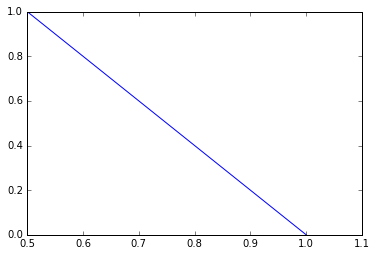

In [27]:
# EVALUATION REPORT FORMATTED
y = [1,1,1,0,0,0]
y_hat = [1,1,0,0,1,0]
''' facilities
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
'''
print classification_report(y,y_hat)
prec, rec, thr = precision_recall_curve(y,y_hat)
print 'AUC: ', roc_auc_score(y,y_hat)
plt.plot(prec,rec)

## MODEL 1: KNN

In [28]:
import numpy as np
from scipy.spatial.distance import cdist

In [29]:
# VOTE
#   idea: each data point x has k nearest neighbors,
#     each of the neighbors (labeled with class tags, but not x) 
#     is entitled to vote for deciding x's class tag (neighbor-similarity assumption).
#     the power of their vote depends on their distance from x.
# CAVEAT
#   when dimension p increase, the data get more sparse (in terms of distance),
#     and it gets harder and harder to find close neighbors.
#     one solution to this is to do some dimension reduction before KNN.
def distance(v, w):
    return cdist(v, w)[0][0]
def normalize_vector(v): # helper function to interface cdist and KNN here.
    return [[i for i in v]]
def majority_vote(labels):
    # labels are assumed to be ordered nearest to farthest.
    voteCounts = Counter(labels)
    winner, winnerCount = voteCounts.most_common(1)[0] # the most frequent class voted.
    numWinners = len([count for count in voteCounts.values() if count == winnerCount])
        # find equally frequently voted classes (alongside the most frequent).
    if numWinners == 1: return winner # we have a unique winner class (by count), take it!
    else: return majority_vote(labels[:-1]) # we don't have a unique winner, try again w/o the farthest neighbor!
def knn_classify(k, labeledPoints, newPoint): # newPoint: [.., .., ..]
    # each labeled point is a pair (point, label).
    byDistance = sorted(labeledPoints, key=lambda (point, _): distance(normalize_vector(point), [newPoint]))
        # order all the labels by their distance from current point: newPoint.
    kNNLabels = [label for _, label in byDistance[:k]]
    return majority_vote(kNNLabels)

In [30]:
# IRIS DATA DEMO
from sklearn.datasets import load_iris
iris = load_iris()
# data = pd.DataFrame(np.hstack((iris.data,iris.target)))
X = pd.DataFrame(iris.data)
y = pd.DataFrame(iris.target)
data = pd.concat([X, y], axis=1)
data.columns = [0,1,2,3,4]
# X_train, X_test, y_train, y_test = train_test_split(X, y, .2)
nrow, ncol = data.shape
labeled_points = [(row[1][:4],row[1][4]) for row in data.iterrows()]
# for i in range(nrow):
#     labeled_points.append((data.loc[i][:4],data.loc[i][-1]))
labeled_points[-1:]

[(0    5.9
  1    3.0
  2    5.1
  3    1.8
  Name: 149, dtype: float64, 2.0)]

In [31]:
newPoint = [5.9,3.0,5.1,1.8]
knn_classify(3, labeled_points, newPoint)

2.0

## MODEL 2: NAIVE BAYES

$ \textbf{INTRO: SPAM FILTER EXAMPLE} $

$ S: \text{Spam}; X = w: \text{Containing a certain word w.} $ 

$ \text{Probability of Spam give a message containing word w: } P(S|X=w) = \frac{P(S,X=w)}{P(X=w)} = \frac{P(X=w|S)P(S)}{P(X=w|S)P(S) + P(X=w|\neg S)P(\neg S)} = \frac{P(X=w|S)}{P(X=w|S) + P(X=w|\neg S)}$

$ \text{k Smoothing (pseudocount): } P(X=w|S) = \frac{k + \#\_of\_spams\_containing\_w}{2k + \#\_of\_spams} $


In [32]:
import re, math
from collections import defaultdict
import pandas as pd

In [33]:
# TOKENIZATION
def tokenize(message):
    message = message.lower()
    allWords = re.findall("[a-z0-9']+", message)
    return set(allWords)
message = "this is a good day at Macy's."
print tokenize(message)

set(['a', 'good', 'this', 'is', 'at', 'day', "macy's"])


In [34]:
# SPAM/~SPAM COUNT DICTIONARY
def count_words(training):
    # return {word: [spamCount, nonSpamCount]}.
    # training: a 2-tuple (message, isSpam).
    counts = defaultdict(lambda: [0, 0])
    for message, isSpam in training:
        for word in tokenize(message):
            counts[word][0 if isSpam else 1] += 1
    return counts
toyTraining = [('welcome to linkedin!', 1), ('hey, this is Pam.', 0), ('how are you, this is Bestbuy.', 1)]
print count_words(toyTraining)

defaultdict(<function <lambda> at 0x11c0c4b18>, {'how': [1, 0], 'this': [1, 1], 'is': [1, 1], 'welcome': [1, 0], 'hey': [0, 1], 'linkedin': [1, 0], 'bestbuy': [1, 0], 'to': [1, 0], 'are': [1, 0], 'you': [1, 0], 'pam': [0, 1]})


In [35]:
# TOTAL SPAM/NONSPAM COUNT
def spam_nonspam_count(training):
    # training: a 2-tuple (message, isSpam).
    # return: spam, nonspam.
    numSpams = reduce(lambda x,y: x+y, [n for (_, n) in training])
    return numSpams, len(training)-numSpams
toyTraining = [('welcome to linkedin!', 1), ('hey, this is Pam.', 0), ('how are you, this is Bestbuy.', 1)]
numSpams, numNonSpams = spam_nonspam_count(toyTraining)
print '# of Spams: ' + str(numSpams) + '; # of Non-Spams: ' + str(numNonSpams)

# of Spams: 2; # of Non-Spams: 1


In [36]:
# WORD PROBS: PR(WORD=SPAM), PR(WORD=NONSPAM)
def word_probabilities(counts, totalSpams, totalNonSpams, k=0.5):
    # w, #spam, #nonspam -> w, Pr(w|spam), Pr(w|~spam).
    return [(w, float(spam+k)/(totalSpams+2*k), float(nonspam+k)/(totalNonSpams+2*k)) 
            for w, (spam,nonspam) in counts.iteritems()]
toyTraining = [('welcome to linkedin!', 1), ('hey, this is Pam.', 0), ('how are you, this is Bestbuy.', 1)]
counts = count_words(toyTraining)
totalSpams, totalNonSpams = spam_nonspam_count(toyTraining)
print word_probabilities(counts, totalSpams, totalNonSpams)

[('how', 0.5, 0.25), ('this', 0.5, 0.75), ('is', 0.5, 0.75), ('welcome', 0.5, 0.25), ('hey', 0.16666666666666666, 0.75), ('linkedin', 0.5, 0.25), ('bestbuy', 0.5, 0.25), ('to', 0.5, 0.25), ('are', 0.5, 0.25), ('you', 0.5, 0.25), ('pam', 0.16666666666666666, 0.75)]


In [37]:
# SPAM PROBS
def spam_probability(wordProbs, message):
    messageWords = tokenize(message)
    logProbSpam = logProbNonSpam = 0.0
    for word, probSpam, probNonSpam in wordProbs:
        if word in messageWords: # if word exists, add log-prob of seeing.
            logProbSpam += math.log(probSpam)
            logProbNonSpam += math.log(probNonSpam)
        else: # if word doesn't appear, add log-prob of not seeing.
            logProbSpam += math.log(1.0 - probSpam)
            logProbNonSpam += math.log(1.0 - probNonSpam)
    probSpam = math.exp(logProbSpam)
    probNonSpam = math.exp(logProbNonSpam)
        # exp(log(p1) + ... + log(pn)) = p1 * ... * pn
    return probSpam / (probSpam + probNonSpam)
toyTraining = [('welcome to linkedin!', 1), ('hey, this is Pam.', 0), ('how are you, this is Bestbuy.', 1)]
counts = count_words(toyTraining)
totalSpams, totalNonSpams = spam_nonspam_count(toyTraining)
wordProbs = word_probabilities(counts, totalSpams, totalNonSpams)
print spam_probability(wordProbs, 'say hi to linkedin')

0.95903497106


In [38]:
# COMPACT REPRESENTATION
#  (NB: assuming all previous functions are included)
class NaiveBayesClassifier:
    
    def __init__(self, k=.5):
        self.k = k
        self.wordProbs = []
    
    def train(self, trainingSet):
        numSpams = len([isSpam for message,isSpam in trainingSet if isSpam])
        numNonSpams = len(trainingSet) - numSpams
        wordCounts = count_words(trainingSet)
        self.wordProbs = word_probabilities(wordCounts, numNonSpams, numNonSpams, self.k)
    
    def classify(self, message):
        return spam_probability(self.wordProbs, message)

### SMSSpamCollection DEMO

In [39]:
# IMPORT DATA
os.chdir('/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/BASIC_TOPICS/DATA_SCIENCE/DATA')
df = pd.read_csv('SMSSpamCollection',delimiter='\t',header=None)
# num_spam = df[df[0]=='spam'][0].count() # 747
# num_ham = df[df[0]=='ham'][0].count() # 4825
df.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [40]:
%%time
# WHIP DATA INTO CORRECT FORMAT
data = [(msg, 1 if tag=='spam' else 0) for _,(tag,msg) in df.iterrows()]
    # df.iterrows() gives: arg1=entire_object, arg2=(col0, col1).
cutOff = int(np.floor(len(data) * .9))
train, test = data[:cutOff], data[cutOff:]

CPU times: user 328 ms, sys: 23.5 ms, total: 352 ms
Wall time: 334 ms


In [41]:
%%time
# TRAINING
classifier = NaiveBayesClassifier()
classifier.train(train)

CPU times: user 113 ms, sys: 15.5 ms, total: 128 ms
Wall time: 119 ms


In [42]:
%%time
# EVALUATION
from sklearn.metrics import accuracy_score
X_test, y_test = [msg.lower() for msg,tag in test], [tag for msg,tag in test]
y_hat = [ 1 if classifier.classify(msg)>.5 else 0 for msg in X_test]
print 'Accuracy: %6f' % accuracy_score(y_test, y_hat)

Accuracy: 0.912186
CPU times: user 2.55 s, sys: 24.7 ms, total: 2.58 s
Wall time: 2.56 s


## MODEL 3A: SIMPLE LINEAR REGRESSION

In [324]:
# SIMPLE LINEAR MODEL
#  y_i = alpha + beta*x_i + (err)
#  alpha=intercept, beta=coef of predictor, err=maybe gaussian.

### SOL 1: ANALYTICAL (matrix positive semidefinite)

In [325]:
# PREDICTION
def predict_simple(alpha, beta, x_i):
    # y_hat.
    return alpha + beta*x_i

In [326]:
# ERROR
def error_simple(alpha, beta, x_i, y_i):
    # diff. between y_true and y_hat.
    return y_i - predict_simple(alpha, beta, x_i)
def sum_of_squared_errors(alpha, beta, x, y):
    # overall error, squared to avoid +/- errors cancelling out.
    return sum(error_simple(alpha, beta, x_i, y_i)**2 for x_i,y_i in zip(x,y))

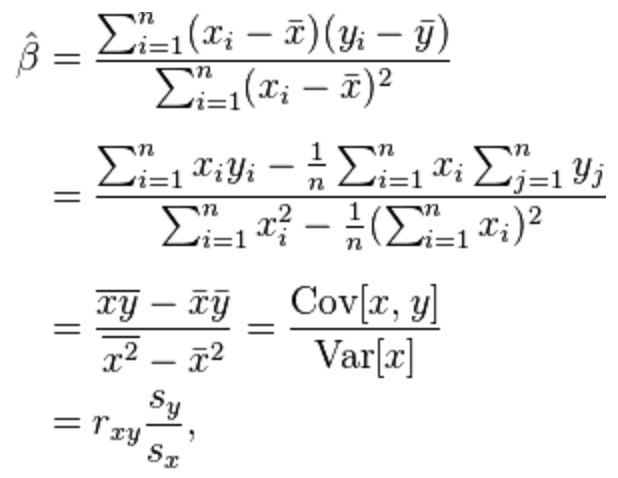

In [327]:
# LEAST SQUARES FIT
#  beta_hat = argmax_beta(sum_of_squared_errors(..beta..)).
Image(filename='least_squares_fit.png', width="20%")

In [334]:
# LEAST-SQUARES FIT
def least_squares_fit(x, y):
    # return argmax_{alpha, beta}(sum_of_squared_errors(alpha,beta)).
    beta = pearsonr(x, y)[0] * np.std(y) / np.std(x)
        # pearsonr returns (correlation, p-value).
    alpha = np.mean(y) - beta * np.mean(x)
    return alpha, beta

In [336]:
# DATA NORMALIZATION
def normalize(y):
    y_mean = np.mean(y)
    y_std = np.std(y)
    return [(y_i-y_mean)/y_std for y_i in y]

In [350]:
# DEMO TOY DATA
d = {'diameter': [6., 8., 10., 14., 18.], \
     'price': [7., 9., 13., 17.5, 18.]}
data = pd.DataFrame(d)
x, y = normalize(data['diameter']), normalize(data['price'])
print "Intercept: %s; Beta: %s" % least_squares_fit(x, y)

Intercept: -2.13862712103e-16; Beta: 0.95394003817


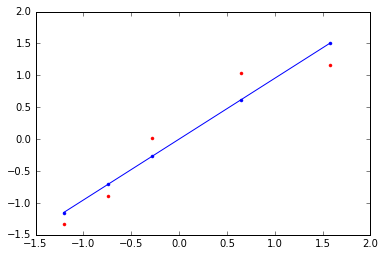

In [351]:
# PLOT REGRESSION
plt.plot(x, y, 'r.')
plt.plot(x, [predict_simple(0, 0.95394003817, x_i) for x_i in x], '.-')
    # red dot: true values; blue dot: predicted value; blue line: regression line.

In [353]:
# EVALUATION: R-SQUARED
#  proportion of variation in the dep. var. captured by model.
def total_sum_of_squares(y):
    # total var. in y.
    return sum(v**2 for v in y)
def r_squared(alpha, beta, x, y):
    # var. captured = 1 - var. not captured.
    return 1.0 - (sum_of_squared_errors(alpha, beta, x, y) / total_sum_of_squares(y))
print "R-squared: %s" % r_squared(0, 0.95394003817, x, y)

R-squared: 0.910001596424


### SOL 2: GRADIENT DESCENT (matrix NOT pos-semidef)

In [354]:
# COMPUTE GRADIENT
def squared_error_simple(x_i, y_i, theta):
    # theta = [alpha, beta].
    alpha, beta = theta
    return error_simple(alpha, beta, x_i, y_i) ** 2
def squared_error_gradient_simple(x_i, y_i, theta):
    alpha, beta = theta
    alphaGrd = -2 * error_simple(alpha, beta, x_i, y_i) # alpha partial deriv.
    betaGrd = -2 * error_simple(alpha, beta, x_i, y_i) * x_i # beta partial deriv.
    return alphaGrd, betaGrd

In [355]:
# DEMO TOY DATA
'''
d = {'diameter': [6., 8., 10., 14., 18.], \
     'price': [7., 9., 13., 17.5, 18.]}
data = pd.DataFrame(d)
'''
x, y = normalize(data['diameter']), normalize(data['price'])
random.seed(0)
theta = [random.random(), random.random()]
alpha, beta = minimize_stochastic(squared_error_simple, squared_error_gradient_simple, x, y, theta, .0001)
print "Intercept: %6f; Beta: %6f" % (alpha, beta)

Intercept: 0.000002; Beta: 0.953919


R-squared: 0.910001595977


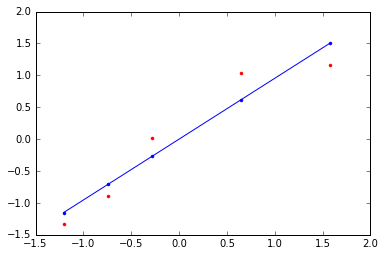

In [356]:
# PLOT REGRESSION & EVALUATION
plt.plot(x, y, 'r.')
plt.plot(x, [predict_simple(alpha, beta, x_i) for x_i in x], '.-')
    # red dot: true values; blue dot: predicted value; blue line: regression line.
print "R-squared: %s" % r_squared(0.000002, 0.953919, x, y)

## MODEL 3B: MULTIPLE REGRESSION

In [344]:
# MULTIPLE LINEAR MODEL
#  y_i = alpha + beta_1*x_i1 + ... + beta_k*x_ik + (err)
#  alpha=intercept, beta=coefs of predictors, err=maybe gaussian.
#  beta = [alpha, beta_1, ..., beta_k]
#  x_i = [1, x_i1, ..., x_ik]

### SOL 1: GRADIENT DESCENT (faster, avoid matrix inversion)

In [362]:
# PREDICTION
def predict_mult(x_i, beta):
    # assuming beta = [1, beta_1, ..., beta_k].
    return dot(x_i, beta)

In [363]:
# ERROR
def error_mult(x_i, y_i, beta):
    return y_i - predict_mult(x_i, beta)
def squared_error_mult(x_i, y_i, beta):
    return error_mult(x_i, y_i, beta) ** 2

In [364]:
# COMPUTE GRADIENT
def squared_error_gradient_mult(x_i, y_i, beta):
    return [-2 * error_mult(x_i, y_i, beta) for x_ij in x_i]
def estimate_beta(x, y):
    betaInit = [random.random() for x_i in x[0]]
    return minimize_stochastic(squared_error_mult, squared_error_gradient_mult, x, y, betaInit, .001)

In [365]:
# DEMO ON 'Advertising.csv'
''' Results in R
Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.938889   0.311908   9.422   <2e-16 ***
TV           0.045765   0.001395  32.809   <2e-16 ***
Radio        0.188530   0.008611  21.893   <2e-16 ***
Newspaper   -0.001037   0.005871  -0.177     0.86   
i.e.
 (Intercept)           TV        Radio    Newspaper 
 2.938889369  0.045764645  0.188530017 -0.001037493
'''

' Results in R\nCoefficients:\n             Estimate Std. Error t value Pr(>|t|)    \n(Intercept)  2.938889   0.311908   9.422   <2e-16 ***\nTV           0.045765   0.001395  32.809   <2e-16 ***\nRadio        0.188530   0.008611  21.893   <2e-16 ***\nNewspaper   -0.001037   0.005871  -0.177     0.86   \ni.e.\n (Intercept)           TV        Radio    Newspaper \n 2.938889369  0.045764645  0.188530017 -0.001037493\n'

In [429]:
# LOAD DATA
data = pd.read_csv('Advertising.csv')
data = data.ix[:,1:]
data = data.ix[1:,:]
data.head()

,TV,Radio,Newspaper,Sales
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2


In [430]:
X, y = data.ix[:,0:3].as_matrix(), data.ix[:,3].as_matrix()
print X[:5]
print y[:5]

[[  44.5   39.3   45.1]
 [  17.2   45.9   69.3]
 [ 151.5   41.3   58.5]
 [ 180.8   10.8   58.4]
 [   8.7   48.9   75. ]]
[ 10.4   9.3  18.5  12.9   7.2]


In [431]:
# NORMALIZATION
for i in range(X.shape[1]):
    X[:,i] = normalize(X[:,i])
y = normalize(y)
print X[:5]
print y[:5]

[[-1.19233886  1.08765326  0.68226646]
 [-1.51107385  1.53327319  1.80239015]
 [ 0.0569155   1.2226896   1.30250024]
 [ 0.39900103 -0.8366146   1.29787163]
 [-1.61031368  1.7358277   2.06622094]]
[-0.69071732564964461, -0.90283576361921147, 0.8712457175808026, -0.20862996662790162, -1.3077891451974757]


In [432]:
# ADD INTERCEPT/BIAS
X = np.hstack((np.zeros((199,1)), X))
X[:5]

array([[ 0.        , -1.19233886,  1.08765326,  0.68226646],
       [ 0.        , -1.51107385,  1.53327319,  1.80239015],
       [ 0.        ,  0.0569155 ,  1.2226896 ,  1.30250024],
       [ 0.        ,  0.39900103, -0.8366146 ,  1.29787163],
       [ 0.        , -1.61031368,  1.7358277 ,  2.06622094]])

In [433]:
%%time
print 'Intercept: %6f; Betas: %6f, %6f, %6f' % tuple(estimate_beta(X,y))

Intercept: 0.103460; Betas: 0.426374, 0.352397, 0.694222
CPU times: user 438 ms, sys: 7.76 ms, total: 445 ms
Wall time: 440 ms


In [404]:
# EVALUATION
def multiple_r_squared(x, y, beta):
    SSErrs = sum(error_mult(x_i, y_i, beta)**2 for x_i,y_i in zip(x,y))
    return 1.0 - SSErrs / total_sum_of_squares(y)
betaGD = estimate_beta(X,y)
# betaOpt = [2.965592, 0.045684, 0.188329, -0.001633] # unnormalized
print multiple_r_squared(X,y,betaGD)
# print multiple_r_squared(X,y,betaOpt) # unnormalized

0.756785058622


In [389]:
## NB: either NORMALIZE ALL, or all variables/response are measured in the same unit!!

### SOL 2: ANALYTICAL

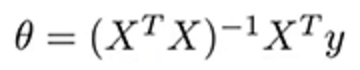

In [390]:
Image(filename='analytical_mult_reg.png', width="20%")

In [394]:
# LOAD DATA
data = pd.read_csv('Advertising.csv')
data = data.ix[:,1:]
data = data.ix[1:,:]
data.head()

,TV,Radio,Newspaper,Sales
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2


In [395]:
X, y = np.hstack((np.ones((data.shape[0],1)),data.ix[:,0:3].as_matrix())), data.ix[:,3].as_matrix()
print X[:5]
print y[:5]

[[   1.    44.5   39.3   45.1]
 [   1.    17.2   45.9   69.3]
 [   1.   151.5   41.3   58.5]
 [   1.   180.8   10.8   58.4]
 [   1.     8.7   48.9   75. ]]
[ 10.4   9.3  18.5  12.9   7.2]


In [399]:
# OPITMAL SOLUTION
#  NB: do it only with non-normalized data!!
print 'Intercept: %6f; Betas: %6f, %6f, %6f' % tuple(np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y))

Intercept: 2.965592; Betas: 0.045684, 0.188329, -0.001633


In [400]:
# EVALUATION
beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
print 'R-squared: %6f' % multiple_r_squared(X,y,beta)

R-squared: 0.987475


## BOOTSTRAP

In [ ]:
# IDEA
#  repeated and randomly sample (w/ replacement) from a sample, 
#  and estimate a chosen central tendency (e.g. mean)
#  by looking at the distribution of the means of the samples.

In [436]:
# DATA carmpg.txt
'''
1. mpg: continuous 
2. cylinders: multi-valued discrete 
3. displacement: continuous 
4. horsepower: continuous 
5. weight: continuous 
6. acceleration: continuous 
7. model year: multi-valued discrete 
8. origin: multi-valued discrete 
9. car name: string (unique for each instance)
'''
data = pd.read_csv('carmpg.txt', sep='\s+', 
                   names=['mpg','cylinders','displacement','horsepower',
                          'weight','acceleration','model_year','origin','car_name'])
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [437]:
# EXAMPLE: MPG
mpg = data['mpg']
mpg.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [438]:
# BOOTSTRAP FUNCTIONS
def bootstrap_sample(data):
    # randomly sample len(data) elements w/ replacement.
    # NB: works with both pd.DataFrame and np.ndarray.
    return [random.choice(data) for _ in data]
def bootstrap_statistic(data, stats_fn, numSamples):
    # evaluate statistic on numSamples bootstrap samples from data.
    return [stats_fn(bootstrap_sample(data)) for _ in range(numSamples)]

In [439]:
# DEMO: MEAN
print 'True mean: ', np.mean(data['mpg'])
print 'Estimated means: ', bootstrap_statistic(mpg, np.mean, 10)
print 'Mean of estimated means: ', np.mean(bootstrap_statistic(mpg, np.mean, 10))

True mean:  23.5145728643
Estimated means:  [22.606783919597984, 23.468341708542713, 23.537939698492462, 23.467085427135679, 23.300502512562819, 23.767587939698494, 23.380402010050251, 23.174120603015073, 23.282663316582916, 23.207035175879398]
Mean of estimated means:  23.6186432161


In [440]:
# REAL DATA: Advertising.csv
#  GD of this data performed horribly, we are trying to confirm this
#  by measuring the standard error on 10 bootstrap samples (400ms per run).
data = pd.read_csv('Advertising.csv')
data = data.ix[:,1:]
data = data.ix[1:,:]
X, y = data.ix[:,0:3].as_matrix(), data.ix[:,3].as_matrix()
for i in range(X.shape[1]):
   X[:,i] = normalize(X[:,i])
y = normalize(y)
X = np.hstack((np.zeros((199,1)), X))

In [449]:
%%time
# ESTIMATE BETA
def estimate_sample_beta(sample):
    # sample is a list of pairs (x_i, y_i).
    xSample, ySample = zip(*sample)
    return estimate_beta(xSample, ySample)
random.seed(1)
bootstrap_betas = bootstrap_statistic(zip(X,y), estimate_sample_beta, 10)
multRSQs = [multiple_r_squared(X,y,beta) for beta in bootstrap_betas]
print multRSQs
    # apparently the RQ values vary a great deal!!

[0.023578763689845683, 0.19234905686207782, 0.24933285850933962, 0.88334978740627734, 0.73303982125205513, -0.013653163882533903, 0.6473409796668419, 0.68747679228419134, -0.20047933133933404, 0.64845413241794558]
CPU times: user 4.24 s, sys: 9.32 ms, total: 4.25 s
Wall time: 4.24 s


### USING BOOTSTRAP TO ESTIMATE P-VALUE

In [456]:
# P-VALUE ON EACH BETA
#  On a particular run, we get:
#   Intercept: 0.103460; Betas: 0.426374, 0.352397, 0.694222
#   we'd like to know if we should reject each beta.
#  First we use bootstrap to get a list of estimated betas to get an estimate
#   of betas' distributions (thus we have mean and std).
#  Then we employ p-value to evaluation: the probabilities that each
#   beta should be rejected.
#  Not knowing the exact t-distribution, we use guassian as an approximation.

meanBeta0, stdBeta0 = np.mean([betas[0] for betas in bootstrap_betas]), np.std([betas[0] for betas in bootstrap_betas])
meanBeta1, stdBeta1 = np.mean([betas[1] for betas in bootstrap_betas]), np.std([betas[1] for betas in bootstrap_betas])
meanBeta2, stdBeta2 = np.mean([betas[2] for betas in bootstrap_betas]), np.std([betas[2] for betas in bootstrap_betas])
meanBeta3, stdBeta3 = np.mean([betas[3] for betas in bootstrap_betas]), np.std([betas[3] for betas in bootstrap_betas])
def p_value(betaHat, betaHatMean, betaHatStd):
    import scipy.stats
    if betaHat > 0:
        # **if the coef is +, we need to compute twice the prob of seeing an even larger value.
        return 2 * (1 - scipy.stats.norm(betaHatMean, betaHatStd).cdf(betaHat/betaHatStd))
    else:
        # **else twice the prob of seeing a smaller value.
        return 2 * scipy.stats.norm(betaHatMean, betaHatStd).cdf(betaHat/betaHatStd)
print 'p-value (beta0): ', p_value(0.103460, meanBeta0, stdBeta0)
print 'p-value (beta1): ', p_value(0.426374, meanBeta1, stdBeta1)
print 'p-value (beta2): ', p_value(0.352397, meanBeta2, stdBeta2)
print 'p-value (beta3): ', p_value(0.694222, meanBeta3, stdBeta3)

p-value (beta0):  1.16873586965
p-value (beta1):  0.000125585667108
p-value (beta2):  0.0
p-value (beta3):  8.12683254026e-14


## REGULARIZATION

In [479]:
# RIDGE PENTALTY
def ridge_penalty(betas, lmd):
    # lmd: regularization hyperparameter.
    return lmd * dot(betas[1:], beta[1:])
def squared_error_ridge(x_i, y_i, betas, lmd):
    # estimate error + ridge penalty on betas.
    return error_mult(x_i, y_i, betas)**2 + ridge_penalty(betas, lmd)

In [480]:
# RIDGE GRADIENT DESCENT
def ridge_penalty_gradient(betas, lmd):
    # gds of ridge penalty.
    # intercept is sustained.
    return [0] + [2*lmd*beta_j for beta_j in betas[1:]]
def squared_error_ridge_gradient(x_i, y_i, betas, lmd):
    # the gd corresponding to the ith squared error term including the ridge penalty.
    return vector_add(squared_error_gradient_mult(x_i, y_i, betas), ridge_penalty_gradient(betas, lmd))

In [481]:
def dot(v, w):
    return sum(v_i*w_i for v_i, w_i in zip(v, w))

In [482]:
# BETA ESTIMATE WITH RIDGE
def estimate_beta_ridge(x, y, lmd):
    betaInit = [random.random() for x_i in x[0]]
    return minimize_stochastic(partial(squared_error_ridge, lmd=lmd),
                               partial(squared_error_ridge_gradient, lmd=lmd),
                               x, y, betaInit, .001)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 6.91 µs


In [485]:
%%time
random.seed(2)
betas = estimate_beta_ridge(X, y, lmd=.01)

CPU times: user 801 ms, sys: 13.3 ms, total: 815 ms
Wall time: 805 ms


In [487]:
betas
print 'p-value (beta0): ', p_value(betas[0], meanBeta0, stdBeta0)
print 'p-value (beta1): ', p_value(betas[1], meanBeta1, stdBeta1)
print 'p-value (beta2): ', p_value(betas[2], meanBeta2, stdBeta2)
print 'p-value (beta3): ', p_value(betas[3], meanBeta3, stdBeta3)

p-value (beta0):  5.74440051082e-10
p-value (beta1):  0.0
p-value (beta2):  1.38362320684
p-value (beta3):  1.53666581609
